<a href="https://colab.research.google.com/github/mchhab/Side_Projects/blob/main/Home_Depot_Case_Study_Sheet_Manik_Chhabra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Task

#Your task is open-ended. It is designed to measure your curiosity, critical thinking, and ability to tell stories using data. Perform descriptive analytics and provide summary statistics on the data. What does it tell us and what are some things that you found interesting and why? What insights should we communicate with the leaders of the various merchandising departments?

#You can perform the analysis in Excel or Python, and you can build the visuals in a tool of your choosing. The final deliverables are an excel or python notebook where you completed your analysis and a PowerPoint presentation where you deliver your critical insights to the team.

#Although not required, demonstrating an ability and making an additional effort to forecast the data will be appreciated.


##**Importing the necessary libraries for this business case study**

In [ ]:
import warnings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#Suppress FutureWarnings

warnings.simplefilter(action='ignore', category=FutureWarning)

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import math

pd.set_option('display.max_rows', None) #displays all rows

##**Understanding the structure of the data**

In [ ]:
df = pd.read_excel('CaseStudy_Merged_Merch_Dept.xlsx') #reads the data
df.head() #returns the first 5 rows of the dataset

,week_start,page_type,taxonomy,key,L1,holiday,page_views,merch_dept
0,2022-10-31,CLP,appliances,CLP>appliances,appliances,none,281729,KITCHEN AND BATH
1,2022-11-07,CLP,appliances,CLP>appliances,appliances,none,307537,KITCHEN AND BATH
2,2022-11-14,CLP,appliances,CLP>appliances,appliances,none,299777,KITCHEN AND BATH
3,2022-11-21,CLP,appliances,CLP>appliances,appliances,thanksgiving,612575,KITCHEN AND BATH
4,2022-11-28,CLP,appliances,CLP>appliances,appliances,none,285861,KITCHEN AND BATH


In [ ]:
df.tail() #returns the last 5 rows of the dataset

,week_start,page_type,taxonomy,key,L1,holiday,page_views,merch_dept
249412,2024-09-23,TY,thank you,TY>thank you,thank you,none,1258642,ONLINE
249413,2024-09-30,TY,thank you,TY>thank you,thank you,none,1331796,ONLINE
249414,2024-10-07,TY,thank you,TY>thank you,thank you,none,1256319,ONLINE
249415,2024-10-14,TY,thank you,TY>thank you,thank you,none,1292454,ONLINE
249416,2024-10-21,TY,thank you,TY>thank you,thank you,none,1425259,ONLINE


In [ ]:
df.shape #returns the number of rows and columns respectively

(249417, 8)

#The dataset has 249417 rows and 8 columns.

In [ ]:
df.info() #prints a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249417 entries, 0 to 249416
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   week_start  249417 non-null  datetime64[ns]
 1   page_type   249417 non-null  object        
 2   taxonomy    249417 non-null  object        
 3   key         249417 non-null  object        
 4   L1          249417 non-null  object        
 5   holiday     249417 non-null  object        
 6   page_views  249417 non-null  int64         
 7   merch_dept  249105 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 15.2+ MB


#Shows the column headers, the number of non-null values per column, and the data type of each column. The data types are accurate for each column header. Moreover, this summary shows that null values exist for column name "merch_dept" since there are around 312 less non-null values than the standard count. That is a potential limitation requiring more scrutiny.

In [ ]:
df.isnull().sum() #finds the null values per column

,0
week_start,0
page_type,0
taxonomy,0
key,0
L1,0
holiday,0
page_views,0
merch_dept,312


#In summary, 312 null values exist in "merch_dept" column.

In [ ]:
df.describe(include='all').transpose() #creates a statistical summary of the numerical and categorical data

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
week_start,249417,NaN,NaN,NaN,2023-11-03 12:46:27.370548480,2022-10-31 00:00:00,2023-05-08 00:00:00,2023-11-06 00:00:00,2024-05-06 00:00:00,2024-10-21 00:00:00,NaN
page_type,249417,5,PLP,234181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taxonomy,249417,2399,appliances,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
key,249417,2542,CLP>appliances,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L1,249417,20,outdoors,47257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday,249417,8,none,215992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
page_views,249417.0,NaN,NaN,NaN,28849.321454,0.0,2137.0,4954.0,13799.0,39945497.0,613077.313215
merch_dept,249105,12,SEASONAL/GARDEN,53514,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Analyzing by column:

1.   **week_start** - The minimum week start date is 10/31/2022. The maximum week start date is 10/21/2024.
2.   **page-type** - Contains 5 unique values. "PLP" is the most frequent value and appears in the column 234181 times
3.   **taxonomy** - Contains 2399 unique values. The most frequent value is "appliances" and appears 208 times.
4.   **key** - Contains 2542 unique values. 'CLP>appliances' is the most frequent value and appears 104 times.
5.   **L1** - Contains 20 unique values. Outdoors is the most frequent value and appears 47257 times.
6.   **holiday** - Contains 8 unique values. 'None' is the most frequent value and appears 215992 times.
7.   **page_views** - The mean number of page views is 28849 per row (rounded). The minimum number of page views is 0. The maximum number of page views is 39945497. The median number of page views is 4954.
8.   **merch_dept** - Contains 12 unique values and has a count of 249105, meaning that there is missing data in the column. Also, the most frequent value in 'merch_dept' is SEASONAL/GARDEN with a value of 53514.


In [ ]:
df.duplicated().sum() #check for duplicate data

0

#As a result, there is no duplicate data in the dataset.

#Bivariate Analysis

In [ ]:
filtered_df =df[df['holiday']!= 'none'] #filtering on only holidays and removing 'none' value from 'holiday' column

In [ ]:
def groupby_barplot(df, groupby_col, value_col, agg_func='sum', title=None, xlabel=None, ylabel=None, figsize=(10, 6),palette= 'viridis'):
    """
    Creates a barplot after performing a groupby operation on the DataFrame.

    Parameters:
    - df: pd.DataFrame
        The dataframe containing the data.
    - groupby_col: str
        Column to group by.
    - value_col: str
        Column containing values to aggregate.
    - agg_func: str, default='sum'
        Aggregation function to apply (e.g., 'sum', 'mean', 'count').
    - title: str, optional
        Title of the barplot.
    - xlabel: str, optional
        Label for the x-axis.
    - ylabel: str, optional
        Label for the y-axis.
    - palette: str, default='viridis'
        Color palette for the barplot.
    - figsize: tuple, default=(10, 6)
        Size of the plot.

    Returns:
    - None
    """
    # Perform the groupby and aggregation
    grouped_data = df.groupby(groupby_col)[value_col].agg(agg_func).sort_values(ascending=False)

    # Create the barplot
    plt.figure(figsize=figsize)
    sns.barplot(x=grouped_data.values, y=grouped_data.index, palette=palette)
    plt.title(title if title else f"{agg_func.title()} of {value_col} by {groupby_col}")
    plt.xlabel(xlabel if xlabel else f"{agg_func.title()} of {value_col}")
    plt.ylabel(ylabel if ylabel else groupby_col)
    plt.tight_layout()
    plt.show()

    print(grouped_data)

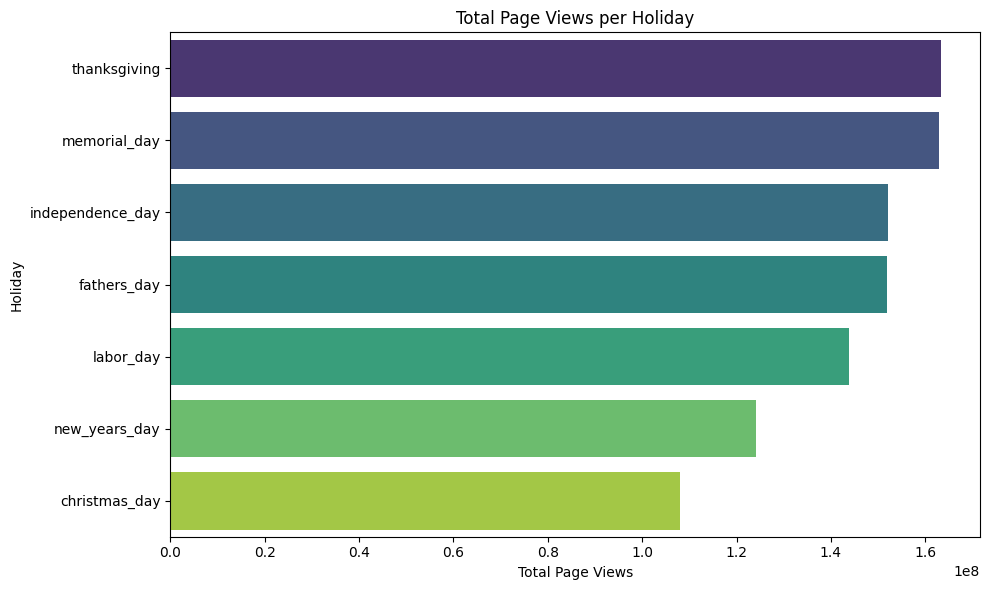

holiday
thanksgiving        163433566
memorial_day        162838830
independence_day    152176519
fathers_day         151851844
labor_day           143943223
new_years_day       124023581
christmas_day       108036456
Name: page_views, dtype: int64


In [ ]:
groupby_barplot(df=filtered_df, groupby_col='holiday',value_col='page_views',agg_func='sum',title='Total Page Views per Holiday',xlabel='Total Page Views',ylabel='Holiday')

#As a result, Thanksgiving, Memorial Day, Independence Day, Father's Day and Labor day are the top 5 holidays respectively that measure the highest views. The potential reason views are at their lowest during New Years and Christmas day is that people are most likely off their computer/mobile screens and are spending more time with family. At that time, the shopping for home improvement has reduced.

#Recommendations

#1.   Special promotions around holidays like Thanksgiving, Memorial Day and Independence day should be scheduled.
#2.   During this period, inventory for highd-demand products should be expanded.
#3.   Coordinate with marketing teams to create holiday-specific advertising campaigns


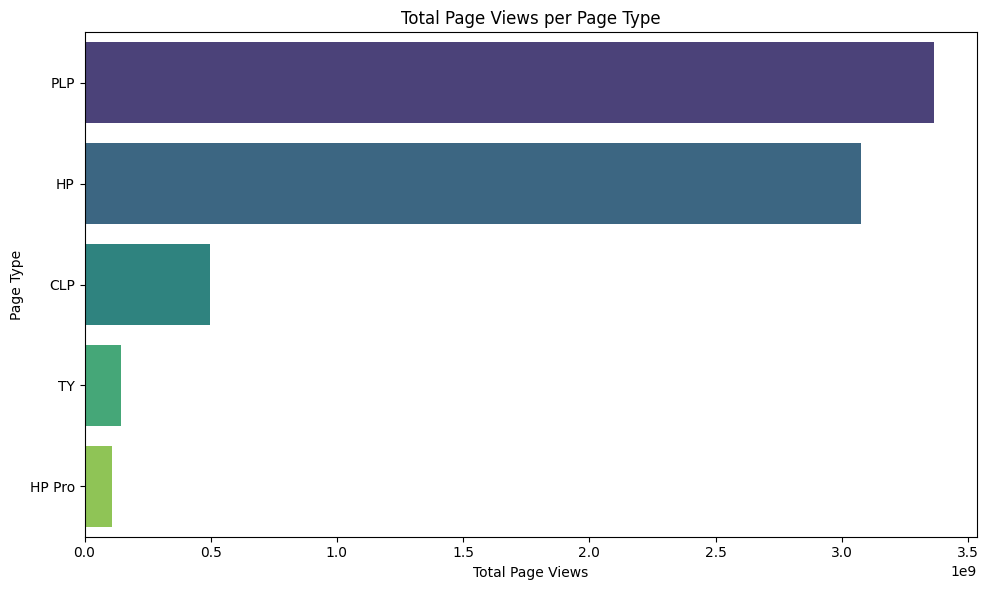

page_type
PLP       3366191782
HP        3076120811
CLP        498379268
TY         145840690
HP Pro     108978658
Name: page_views, dtype: int64


In [ ]:
groupby_barplot(df=df, groupby_col='page_type',value_col='page_views',agg_func='sum',title='Total Page Views per Page Type',xlabel='Total Page Views',ylabel='Page Type')

#In summary, PLP (Product Landing Page) and HP (Home Page) are the top 2 page types with the most views. PLP (3366191782) and HP (3076120811) have similar page views. TY (Thank You or Checkout) page is one of the lowest viewed pages because most people are viewing the product versus converting on the product. Uncertain what HP Pro signifies.

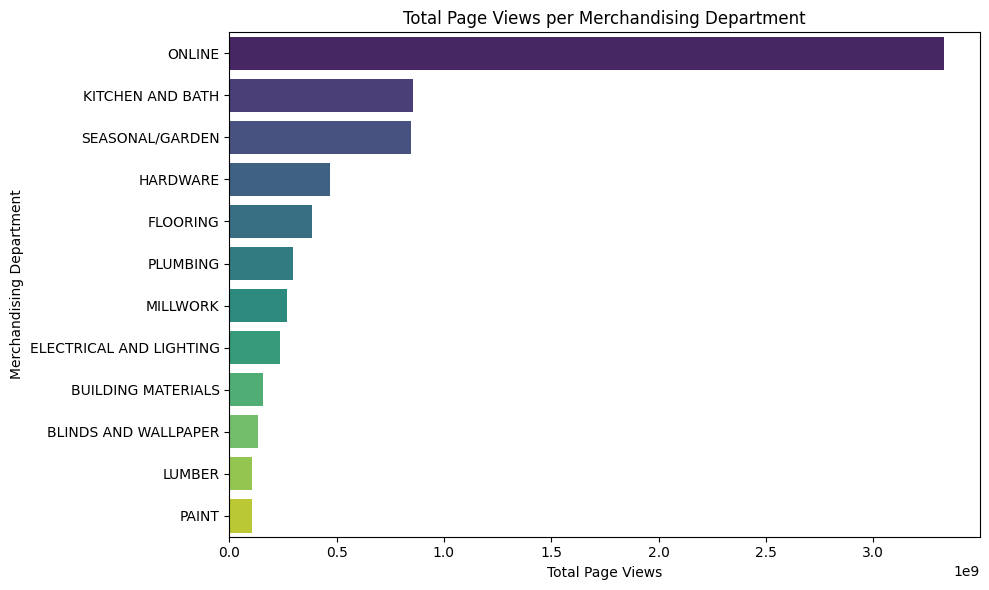

merch_dept
ONLINE                     3330940159
KITCHEN AND BATH            856293585
SEASONAL/GARDEN             847745262
HARDWARE                    471555602
FLOORING                    385575681
PLUMBING                    297951055
MILLWORK                    266751666
ELECTRICAL AND LIGHTING     236079101
BUILDING MATERIALS          156073455
BLINDS AND WALLPAPER        133054016
LUMBER                      107746592
PAINT                       105413400
Name: page_views, dtype: int64


In [ ]:
groupby_barplot(df=df, groupby_col='merch_dept',value_col='page_views',agg_func='sum',title='Total Page Views per Merchandising Department',xlabel='Total Page Views',ylabel='Merchandising Department')

#In summary, online merchandising department, kitchen and bath, seasonal/garden, hardware, flooring are respectively the top 5 departments with the most views. Considering that the online merchandising department has the highest views, it suggests strong customer preference for e-commerce. Therefore, stakeholders should invest in optimizing the online user experience (website speed, mobile compatibility), personalization strategies to boost conversions, and marketing efforts to retain and attract customers. Secondly, kitchen and bath are showing consistent traffic. Recommendation to leaders would be to strengthen its presence by promoting complementry items and offering bundled discounts to increase average cart size.

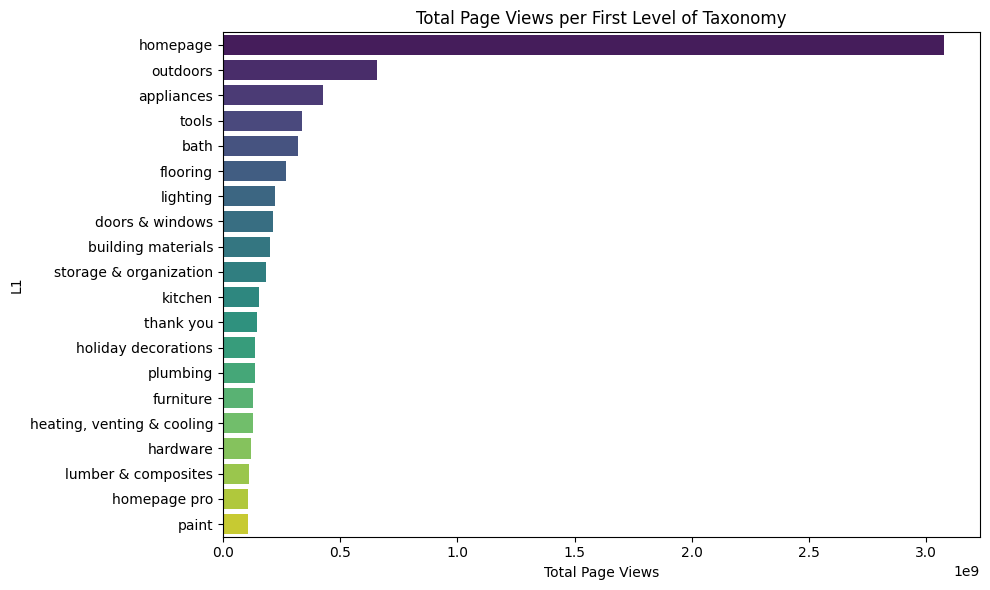

L1
homepage                      3076120811
outdoors                       658436177
appliances                     426700209
tools                          339411540
bath                           318443910
flooring                       270495260
lighting                       221551484
doors & windows                215123720
building materials             202694815
storage & organization         184289123
kitchen                        154947675
thank you                      145840690
holiday decorations            138166062
plumbing                       136234066
furniture                      128380974
heating, venting & cooling     128061375
hardware                       121796543
lumber & composites            113465999
homepage pro                   108978658
paint                          106372118
Name: page_views, dtype: int64


In [ ]:
groupby_barplot(df=df, groupby_col='L1',value_col='page_views',agg_func='sum',title='Total Page Views per First Level of Taxonomy',xlabel='Total Page Views',ylabel='L1')

#In summary, homepage, outdoors, appliances, tools, and bath are the top 5 first levels of taxonomy that have the most views. (Heating, venting, and cooling), hardware, lumber and composites, homepage pro, and paint have the least amount of views.

Top-Viewed Merchandising Departments:
 merch_dept
ONLINE                     3330940159
KITCHEN AND BATH            856293585
SEASONAL/GARDEN             847745262
HARDWARE                    471555602
FLOORING                    385575681
PLUMBING                    297951055
MILLWORK                    266751666
ELECTRICAL AND LIGHTING     236079101
BUILDING MATERIALS          156073455
BLINDS AND WALLPAPER        133054016
LUMBER                      107746592
PAINT                       105413400
Name: page_views, dtype: int64
Seasonal Sales Patterns for Top Merchandising Department:
 Month                     2022-10   2022-11   2022-12    2023-01    2023-02  \
merch_dept                                                                    
BLINDS AND WALLPAPER      1192408   5305596   4459764    7404484    5292543   
BUILDING MATERIALS         996564   3759083   3389126    5778089    4753052   
ELECTRICAL AND LIGHTING   2088760   9245588   8663661   13081790    9205160   
FLOORING 

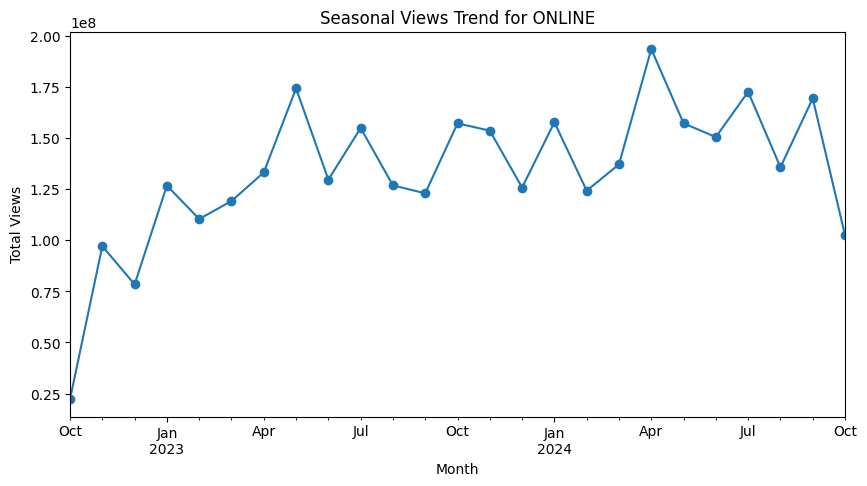

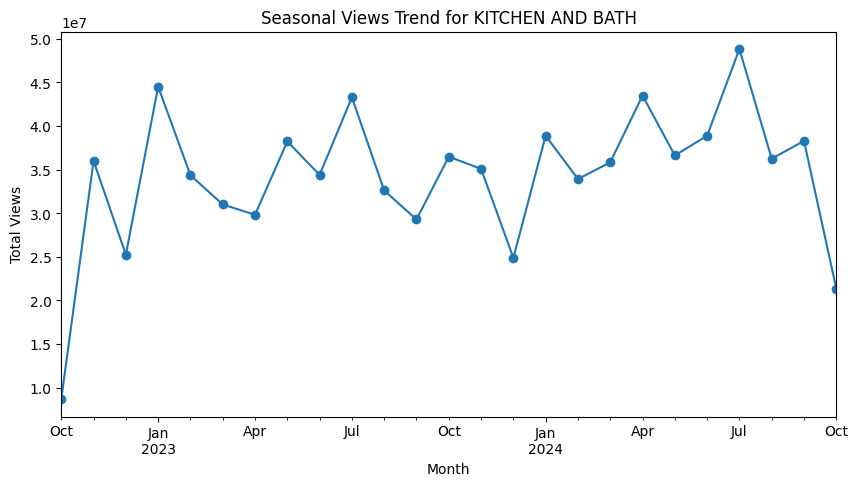

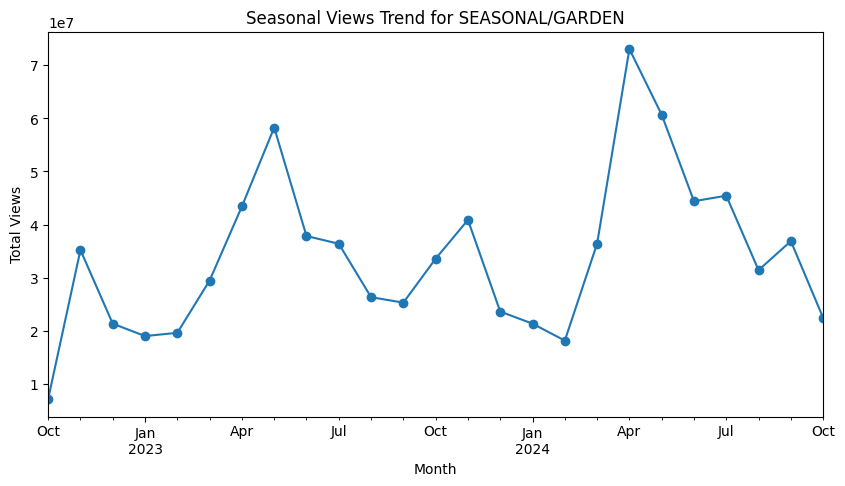

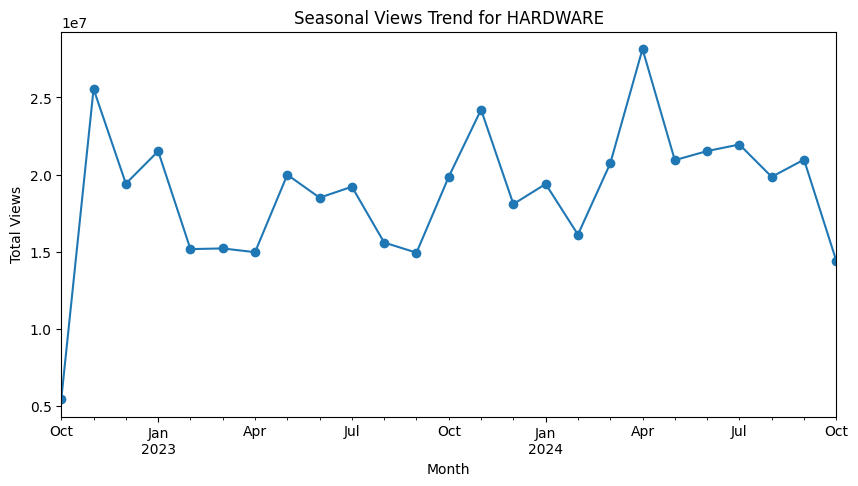

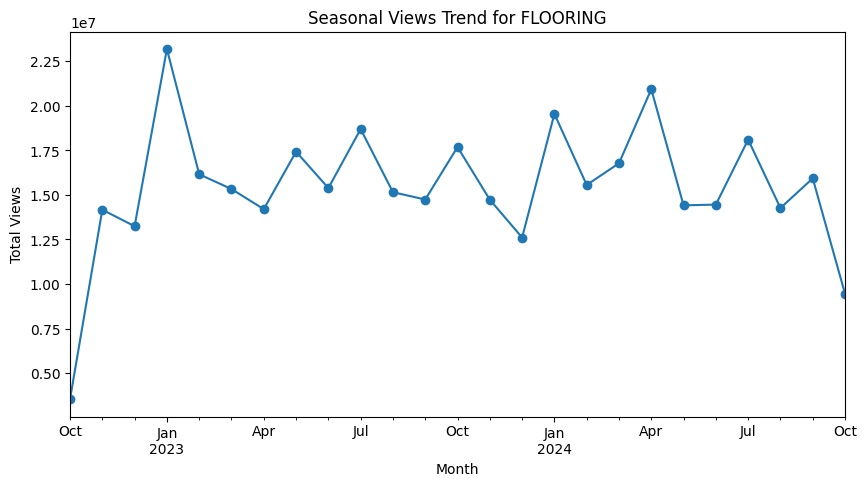

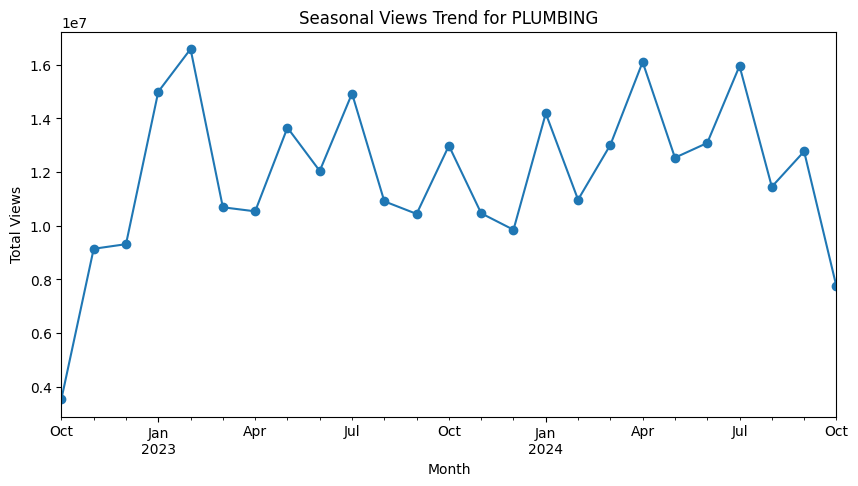

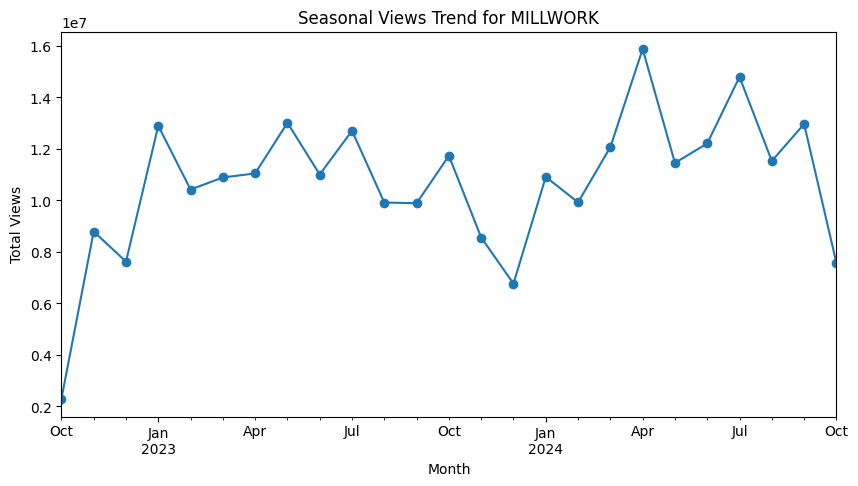

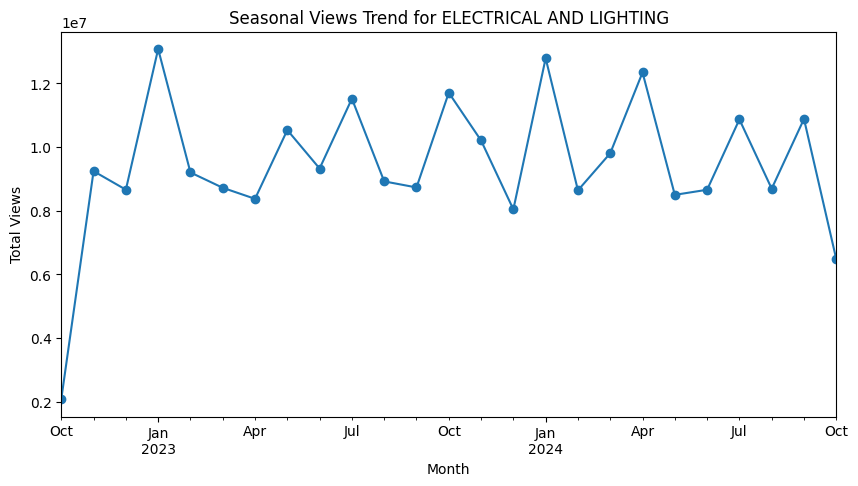

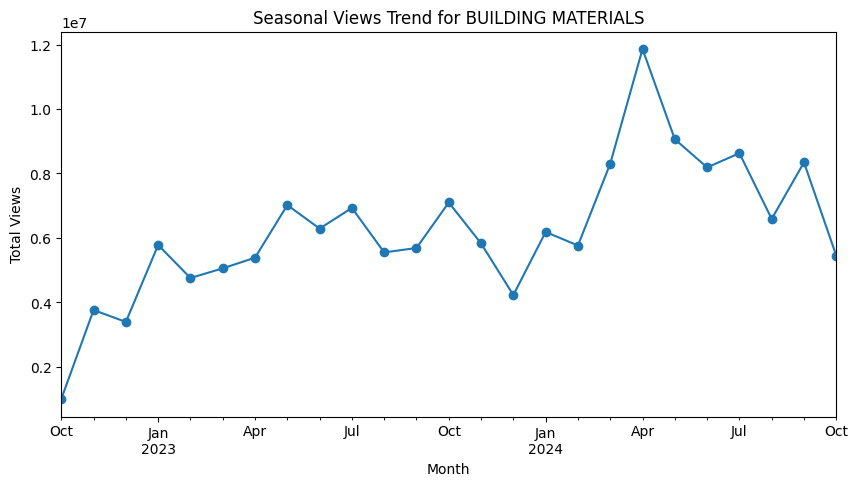

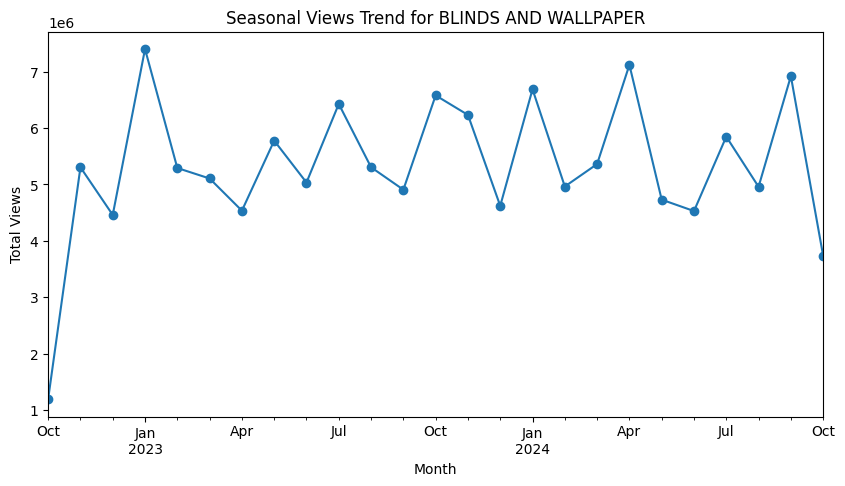

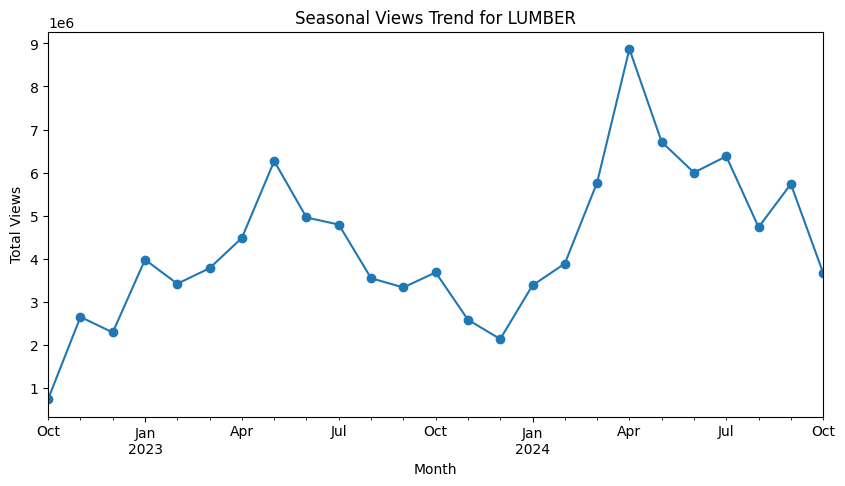

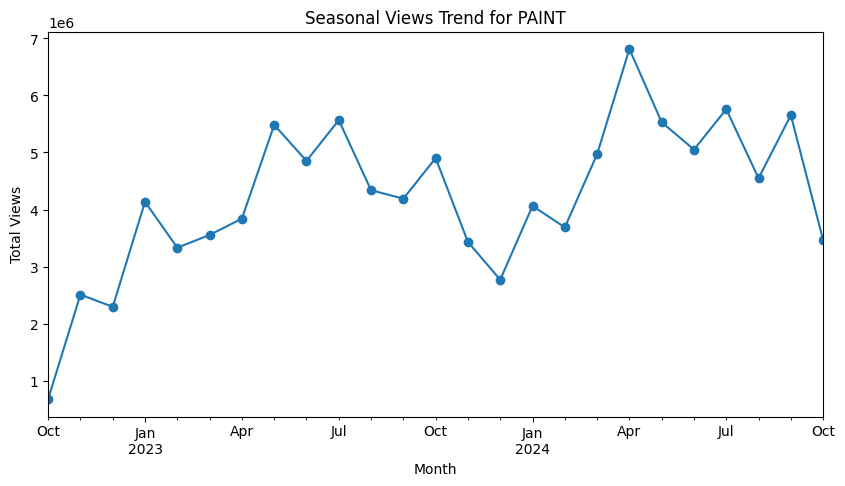

In [ ]:
df['Month'] = df['week_start'].dt.to_period('M')
top_merch = df.groupby('merch_dept')['page_views'].sum().sort_values(ascending=False)
print("Top-Viewed Merchandising Departments:\n", top_merch)

top_merch_ids = top_merch.index
seasonal_data = df[df['merch_dept'].isin(top_merch_ids)]
seasonal_trend = seasonal_data.groupby(['merch_dept', 'Month'])['page_views'].sum().unstack(fill_value=0)

print("Seasonal Sales Patterns for Top Merchandising Department:\n", seasonal_trend)

# Plot Seasonal Patterns for Each Top Merchandising Department
for merch in top_merch_ids:
    plt.figure(figsize=(10, 5))
    seasonal_trend.loc[merch].plot(kind='line', marker='o')
    plt.title(f"Seasonal Views Trend for {merch}")
    plt.xlabel("Month")
    plt.ylabel("Total Views")
    plt.show()

#The detailed data above shows trends by month for all merchandising departments. Certain merchandising departments have consistent spikes in page views during specific months, possibly tied to promotional activities or seasonal demand. For example, departments such as "Seasonal/Garden' see a surge in views in spring months due to outdoor activities and gardening needs. In regards to the 'Online' department (October 2022 - October 2024), there has been a surge in page views from a minimum of 0.25 X10^8 views to 1.9X10^8 views.According to the Online data, there is a steady increase in views from Feb 2023 till May 2023 and also from Feb 2024 till April 2024. Also, during the summers, there is a decline in total views for the online department, potentially due to people spending more time outdoors.
#Analyzing the Kitchen and Bath visualization, there is a sharp increase in views from Dec 2023 to Jan 2023 and from Dec 2023 to Jan 2023. This result could be due to the promotional marketing strategies used for kitchen and bath products during the New Year. July 2024 (48,827,175 views) had the highest views for the Kitchen and Bath merchandising department. The lowest engagement occurred in October 2022, with only 8,696,833 views, possibly due to seasonal trends or reduced marketing. The sharp decline in October suggests reduced interest or lesser campaign efforts during that time. Overall, kitchen and bath maintain steady performance throughout the year, indicating consistent demand for these products.
#Analyzing the Hardware merchandising visualization, on average, this department earns approximately 18,862,224 views per month, indicating moderate but consistent engagement. The highest engagement occured in April 2024 (28,142,461 views) due to springtime home improvement projects. The lowest engagement occured in October 2022, with only 5,433,980 views, reflecting lower seasonal interest or reduced marketing efforts. There is a noticeable spike in Spring 2024, different from the plateau in the spring of 2023. Moreover, there is a spike from October to November in both years, highlighting the effect of Thanksgiving.
#Analyzing the Flooring merchandising visualization, the highest activity occurred in Jan 2023, with 23,178,044 views, possibly tied to New Year renovations or flooring upgrades after the holidays. Plan marketing campaigns and promotions in December to capitalize on the January spike (occurring in both years 2023 and 2024). The lowest engagement occurred on October 2022, with 3,548,427 views, reflecting a seasonal dip in demand. During off-season demand, promtoe discounts or special offers during the fall months to drive traffic and engagement.
#Analyzing the Plumbing merchandising visualization, the average monthly engagement is approximately 11,918,042 views, indicating steady interest in this category. The highest activity occurred in February 2023 with 16,588,680 views, possibly tied to winter-related plumbing issues or preparations for spring. The lowest engagement occurred in October 2022, with 3,544,055 views, reflecting a seasonal dip. Also, a huge spike occurs between December to January (in both 2022 to 2023 and 2023 to 2024) and June to July (in both years). Plan marketing campaigns in December to prepare for January and February's spike focusing on essential plumbing repairs or upgrades.
#Analyzing the Millwork visualization, on average, the department garnered 10,670,067 views per month, indicating moderate engagement. The highest activity occurred in April 2024, with 15,870,353 views, possibly due to renovation projects. The lowest engagement was in October 2022, with 2,287,731 views, reflecting minimal demand during this period. Millwork demand declined significantly during the fall, therefore creating targeted marketing campagins during fall months would stimulate interest. Also, similar to other departments, millwork page views increased from December to January in both years.
#Analyzing the Electrical and Lighting visualization, views appear steadily consistent over the two years. On average, the department garners approximately 9,443,164 views per month, showing steady engagement. The highest activity occurred in January 2023, with 13,081,790, potentially linked to the new year renovations. The lowest engagement occurred in October 2022, with only 2,088,760 views, reflecting a seasonal dip in demand. Marketing campaigns need to get launched in December to prepare for the January spike (occurred in the past two years). There is a decline in views in the fall, incentivizing more discount bundles for electrical products.
#Analyzing the Building materials visualization, the department garners approximately 6,242,938 views per month, indicating steady interest. The highest activity occurred in April 2024, with 11,860,377 views, driven by springtime construction or home improvement projects. The lowest engagement occurred in October 2022, with only 996,564 views, reflecting minimal seasonal demand during the fall. A huge spike appears between Feb 2024-April 2024. This could be due to spring aligning with outdoor renovation projects and also increased marketing spend because in the Spring of 2023, there was no increase in views (there was only a slight increase). 2024 showed an increase in views as compared to 2023 - there was a drastic increase as seen by the trendline.
#Analyzing Blinds and Wallpaper visualization, on average, this department garners approximately 5,322,161 views per month, reflecting consistent interest. The highest activity occurred in January 2023, with 7,404,484 view, possibly tied to New Year home decor projects. The lowest engagement occurred in October 2022, with 1,192,408 views, showing reduced seasonal demand during the fall. As in the case with all departments, there is a spike between December to January (for both years), indicating home improvemnts for the New Year. Overall, there was an increase in engagement from the year 2022-2024.
#Analyzing the Lumber department visualization, on average the department garners approximately 4,309,864 views per month, reflecting moderate and consistent demand. The highest activity occurred in April 2024, with 8,869,839 views, likely driven by springtime construction and outdoor projects. The lowest engagement was in October 2022, with only 739,773 views. Based on the trend in the lineplot, a steady increase is displayed from January till around around April/May and then there is a steady drop from May till December.
#Analyzing the Paint department visualization, it receives approximately 4,216,536 views per month, reflecting moderate and steady interest. The highest activity occurred in April 2024, with 6,811,969 views, driven by springtime home improvement projects. The lowest engagement was in October 2022, with only 679,923 views. The trend for the paint department is highly similar to the trend for the lumbar department.

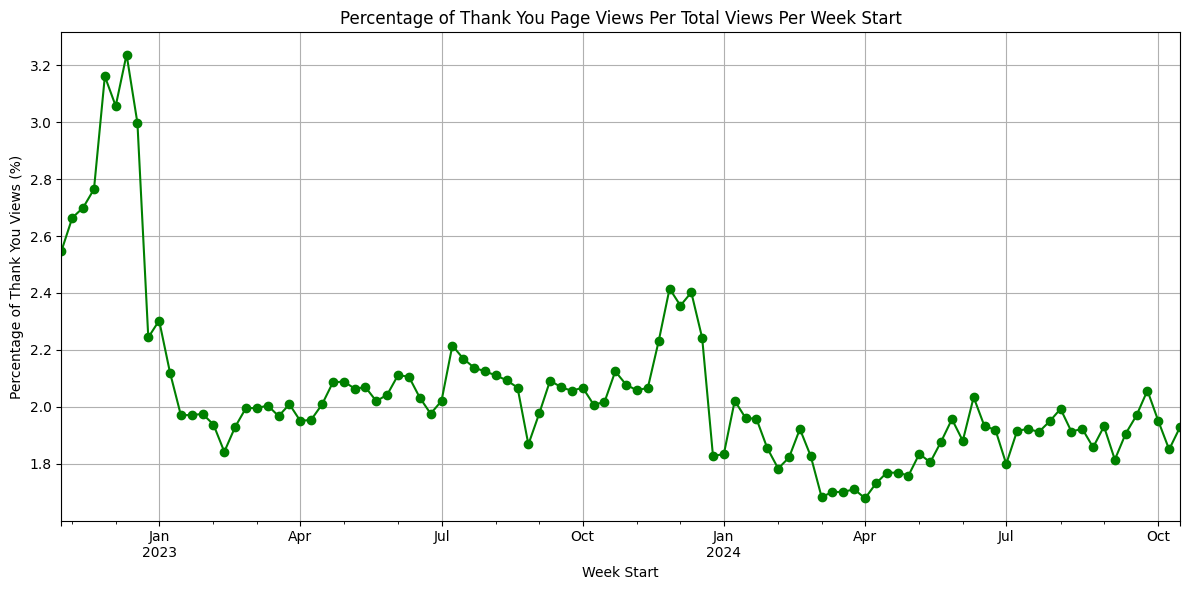

    week_start  Thank You Page View Ratio (%)
6   2022-12-12                       3.237849
4   2022-11-28                       3.161298
5   2022-12-05                       3.056905
7   2022-12-19                       2.997232
3   2022-11-21                       2.764623
2   2022-11-14                       2.699742
1   2022-11-07                       2.664103
0   2022-10-31                       2.547168
56  2023-11-27                       2.415181
58  2023-12-11                       2.402080
57  2023-12-04                       2.355632
9   2023-01-02                       2.303082
8   2022-12-26                       2.243656
59  2023-12-18                       2.242449
55  2023-11-20                       2.231336
36  2023-07-10                       2.215330
37  2023-07-17                       2.169355
38  2023-07-24                       2.137522
51  2023-10-23                       2.124608
39  2023-07-31                       2.124391
10  2023-01-09                    

In [ ]:
# Filter for "Thank You" pages
thank_you_views = df[df['page_type'] == 'TY'].groupby('week_start')['page_views'].sum()

# Calculate total views per week start
total_views_per_week_start = df.groupby('week_start')['page_views'].sum()

# Calculate the ratio of "Thank You" page views to total views per week start
thank_you_ratio = (thank_you_views / total_views_per_week_start) * 100

# Plot the "Thank You" page views ratio over weeks
plt.figure(figsize=(12, 6))
thank_you_ratio.plot(kind='line', marker='o', color='green')
plt.title("Percentage of Thank You Page Views Per Total Views Per Week Start")
plt.xlabel("Week Start")
plt.ylabel("Percentage of Thank You Views (%)")
plt.grid()
plt.tight_layout()
plt.show()

# Display the calculated ratios as a DataFrame
thank_you_ratio_df = thank_you_ratio.reset_index(name="Thank You Page View Ratio (%)")
sorted_ratios_desc = thank_you_ratio_df.sort_values(by="Thank You Page View Ratio (%)", ascending=False)
print(sorted_ratios_desc)

#Conversions are at their highest during the Christmas holiday season in 2022

            holiday  Thank You Page View Ratio (%)
6      thanksgiving                       2.471535
0     christmas_day                       2.294153
1       fathers_day                       2.067451
5     new_years_day                       2.022761
4      memorial_day                       1.997445
3         labor_day                       1.952926
2  independence_day                       1.902404


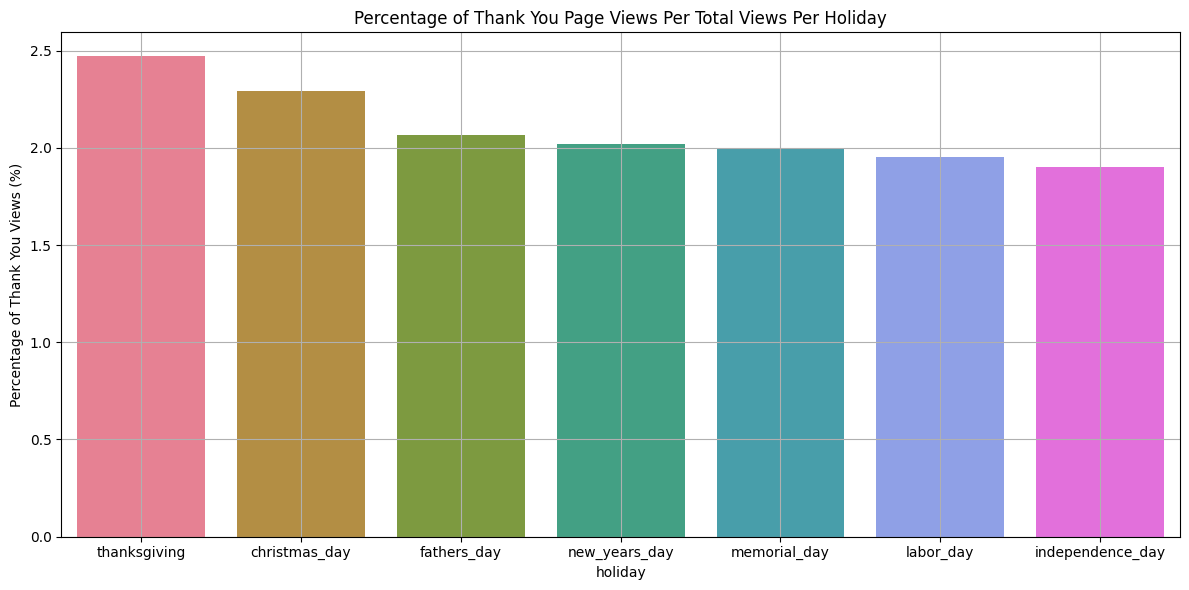

In [ ]:
# Filter for "Thank You" pages and group by holiday
thank_you_views_per_hol = filtered_df[filtered_df['page_type'] == 'TY'].groupby(['holiday'])['page_views'].sum()

# Calculate total views per holiday
total_views_per_hol = filtered_df.groupby(['holiday'])['page_views'].sum()

# Calculate the ratio of "Thank You" page views to total views per holiday
thank_you_ratio_per_hol = (thank_you_views_per_hol / total_views_per_hol) * 100

# Reset index for better presentation
thank_you_ratio_df_hol = thank_you_ratio_per_hol.reset_index(name="Thank You Page View Ratio (%)")

# Sort the ratios in descending order
sorted_ratios_desc = thank_you_ratio_df_hol.sort_values(by="Thank You Page View Ratio (%)", ascending=False)

# Display the sorted ratios
print(sorted_ratios_desc)

# Create a list of colors (or use a predefined palette)
custom_palette = sns.color_palette("husl", len(sorted_ratios_desc['holiday'].unique()))

# Visualization for thank you ratio grouped by holiday
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_ratios_desc, x='holiday', y="Thank You Page View Ratio (%)",palette=custom_palette)
plt.title("Percentage of Thank You Page Views Per Total Views Per Holiday")
plt.xlabel("holiday")
plt.ylabel("Percentage of Thank You Views (%)")
plt.grid()
plt.tight_layout()
plt.show()

#Based on the results, Thanksgiving (2.47%), Christmas (2.29%), and Father's Day (2.07%) are the top three holidays with the highest conversion rates. Investigate why certain holidays have higher conversion rates - identify specific campaigns, discounts, or promotions that drove customer engagement. Optimize the layout and flow of pages leading to "Thank You" pages. Minimize steps in the checkout process to make it easier for the user to convert on the product. Customize offers based on holiday themes - highlight holiday-related items prominently on landing pages.

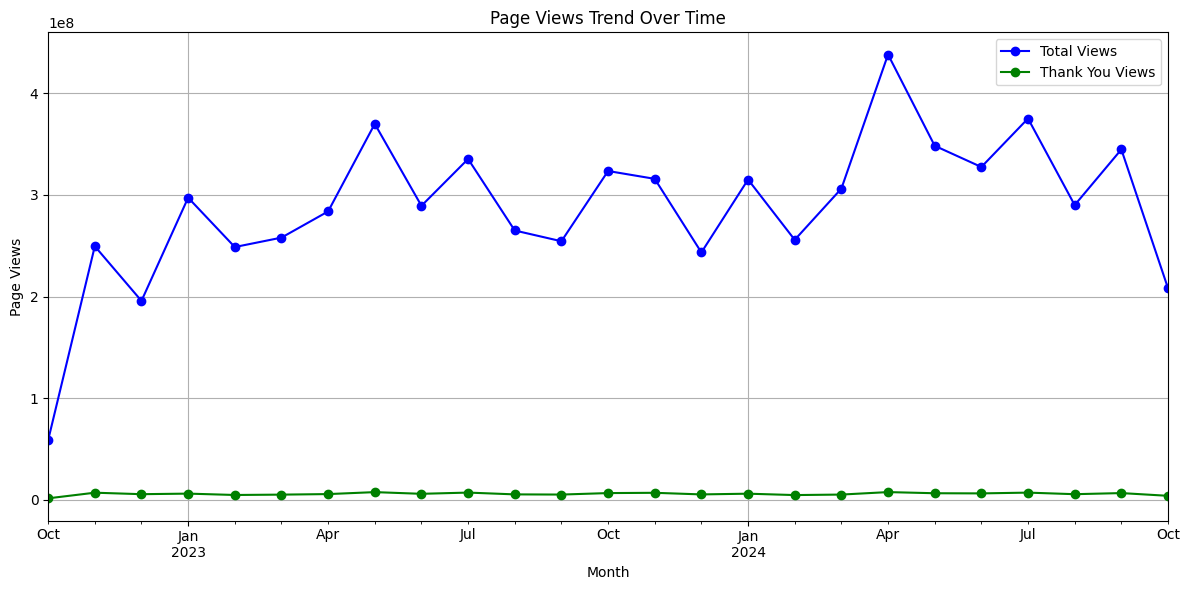

In [ ]:
# Total page views over time
total_views_time = df.groupby('Month')['page_views'].sum()
thank_you_views_time = df[df['page_type'] == 'TY'].groupby('Month')['page_views'].sum()

# Visualization
plt.figure(figsize=(12, 6))
total_views_time.plot(label='Total Views', color='blue', marker='o')
thank_you_views_time.plot(label='Thank You Views', color='green', marker='o')
plt.title("Page Views Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Page Views")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#This visualization displays total views over time compared to 'Thank You' views over time. 'Thank You' views remains stagnant over the two year course (Oct 2022- Oct 2024). On the other hand, page views were at their lowest in October 2022 and at their highest on April 2024. There was a sharp spike from March 2023-May 2023 and (February 2024-April 2024) potentially tied to the upward trend in buying home improvement goods for the Spring. Also, there appears to be a noticeable spike in views from December till January in both year, possibly due to customers searching for home renovation for the new year.

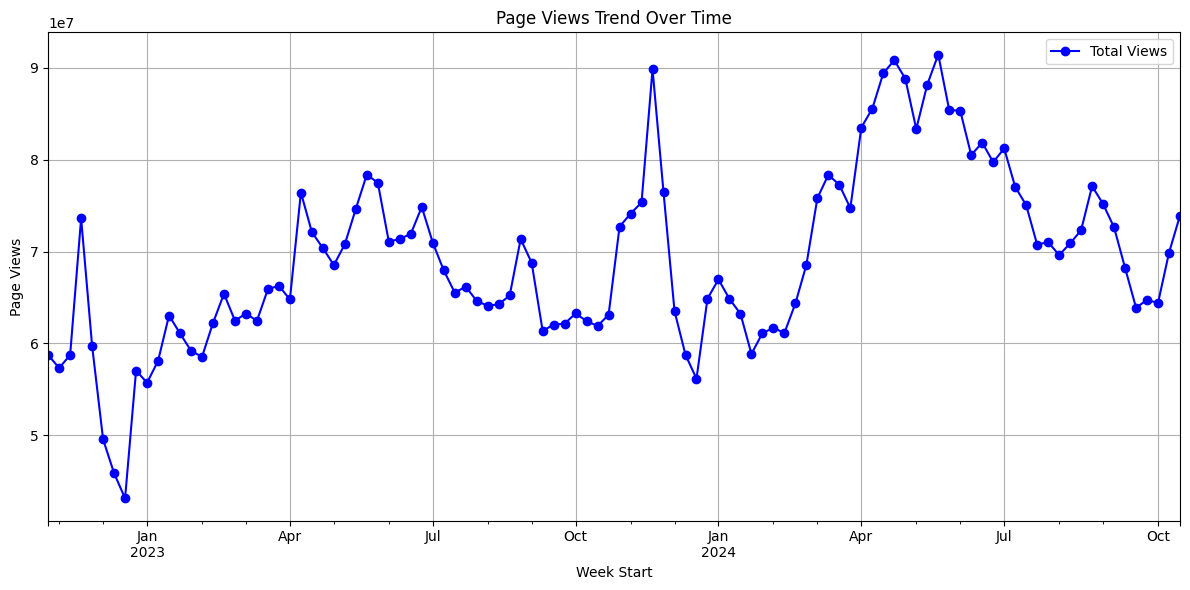

In [ ]:
# Total page views over time
total_views_time = df.groupby('week_start')['page_views'].sum()

# Visualization
plt.figure(figsize=(12, 6))
total_views_time.plot(label='Total Views', color='blue', marker='o')
plt.title("Page Views Trend Over Time")
plt.xlabel("Week Start")
plt.ylabel("Page Views")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#This view provides page views over time; analysis is provided in the powerpoint.

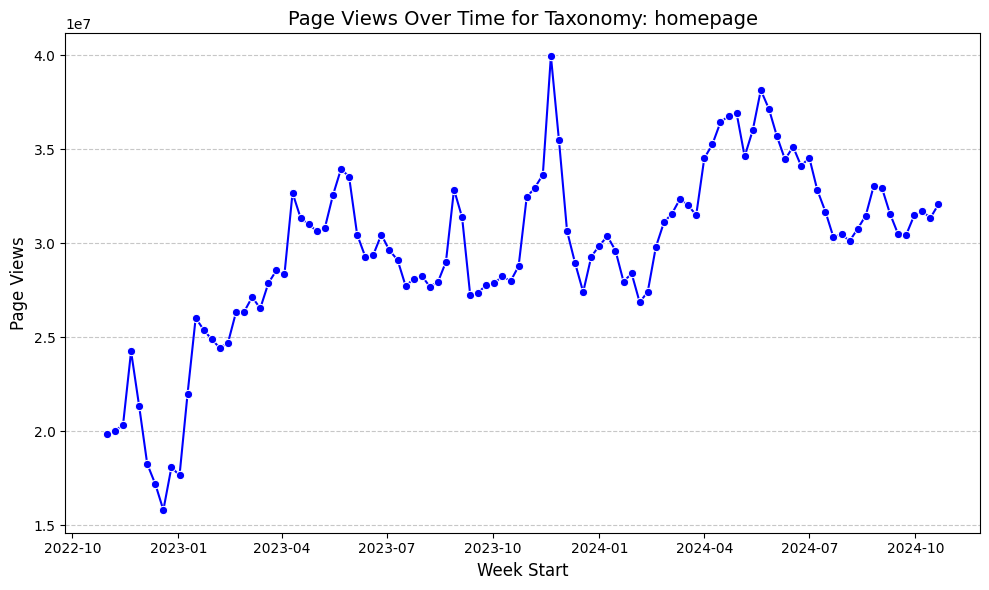

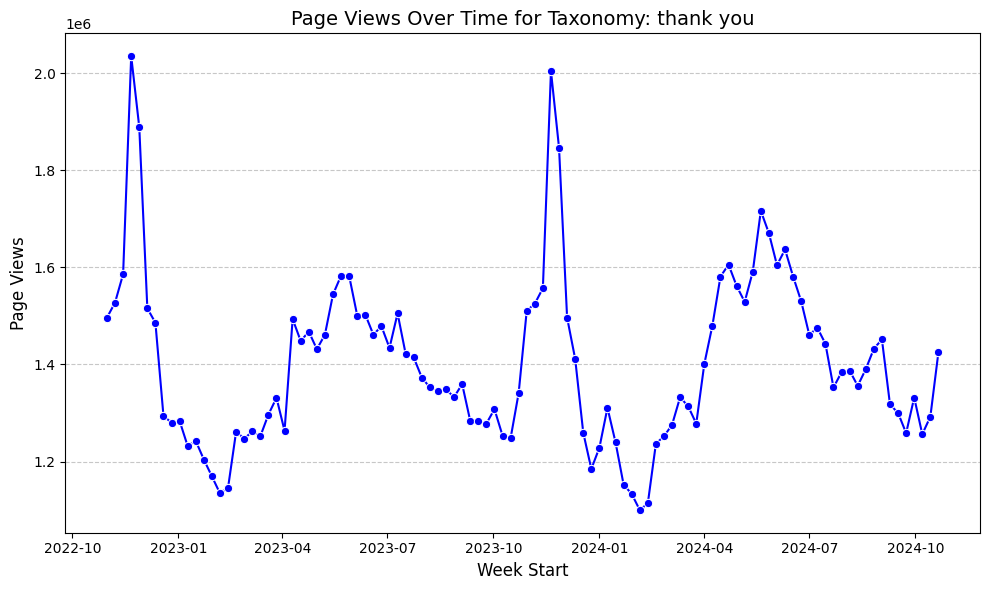

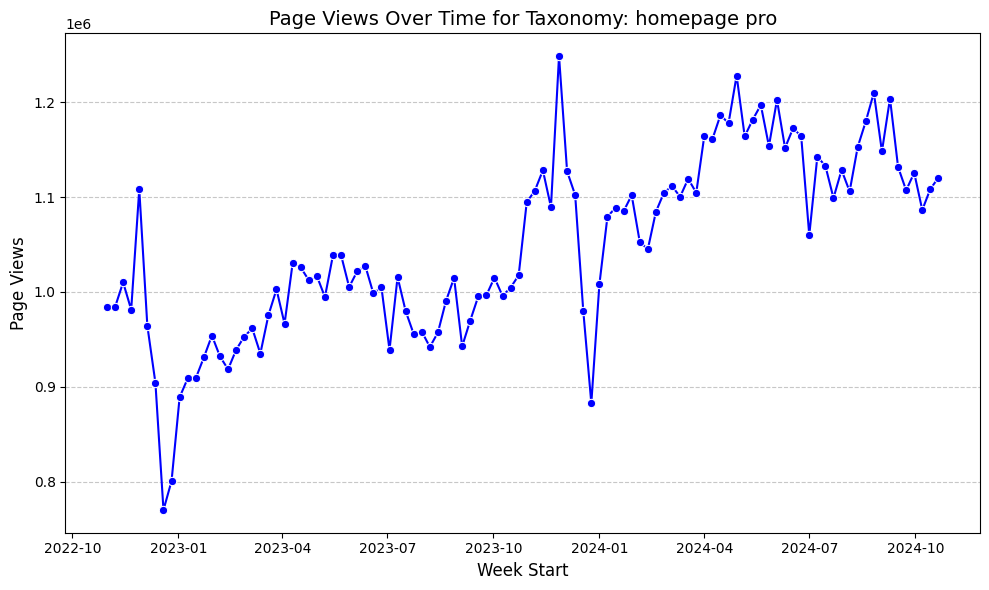

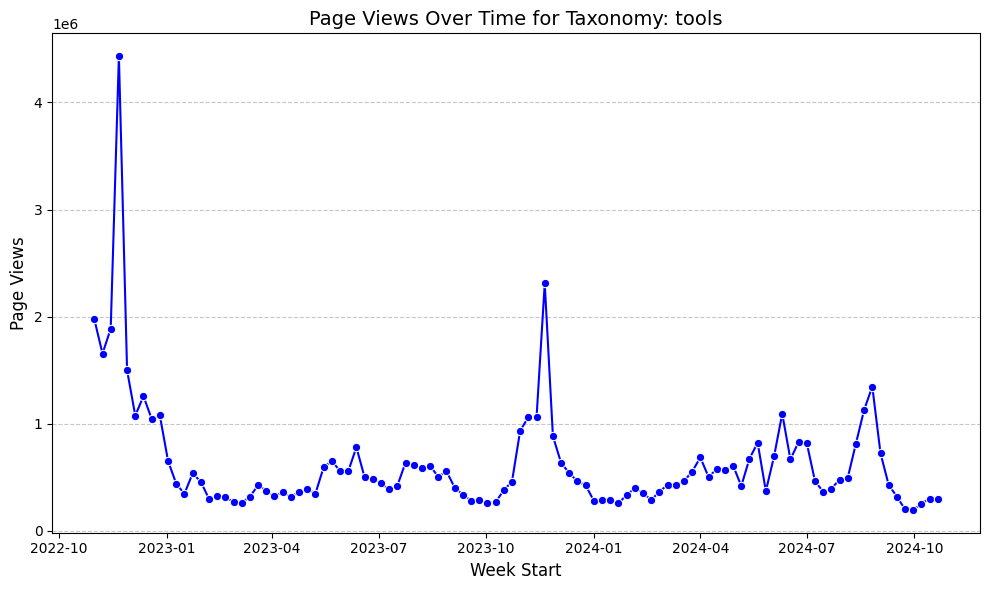

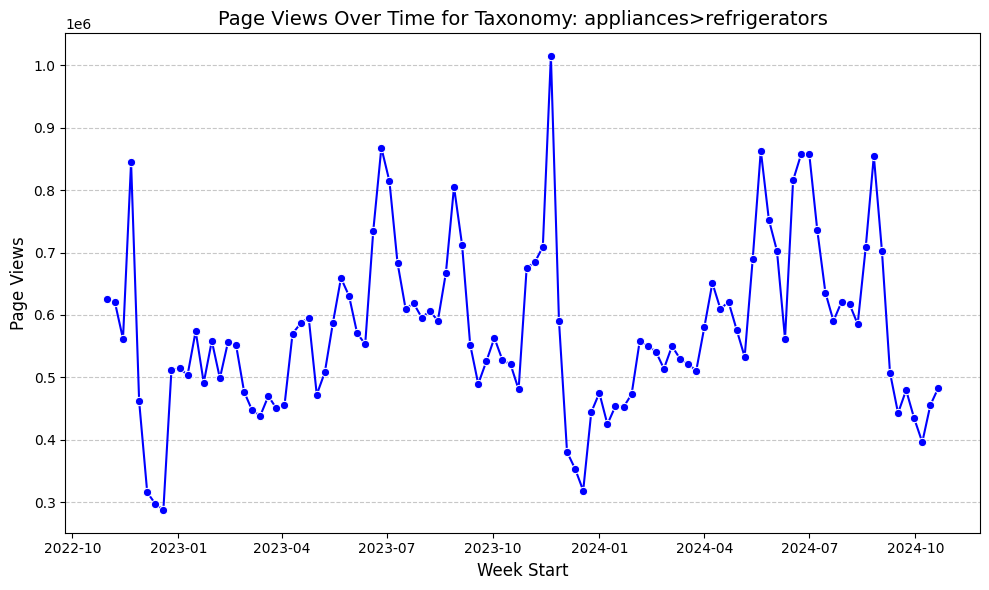

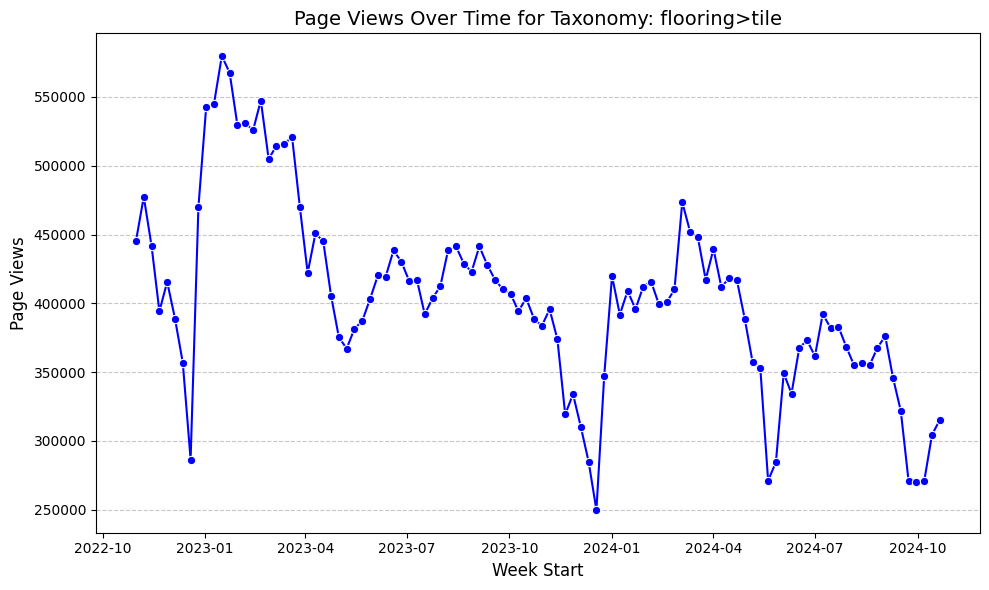

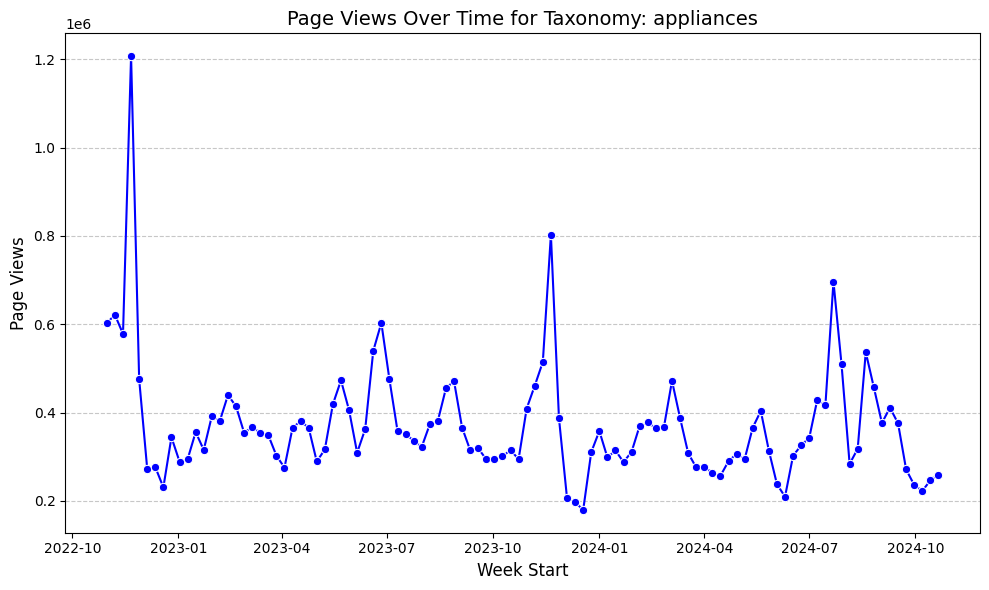

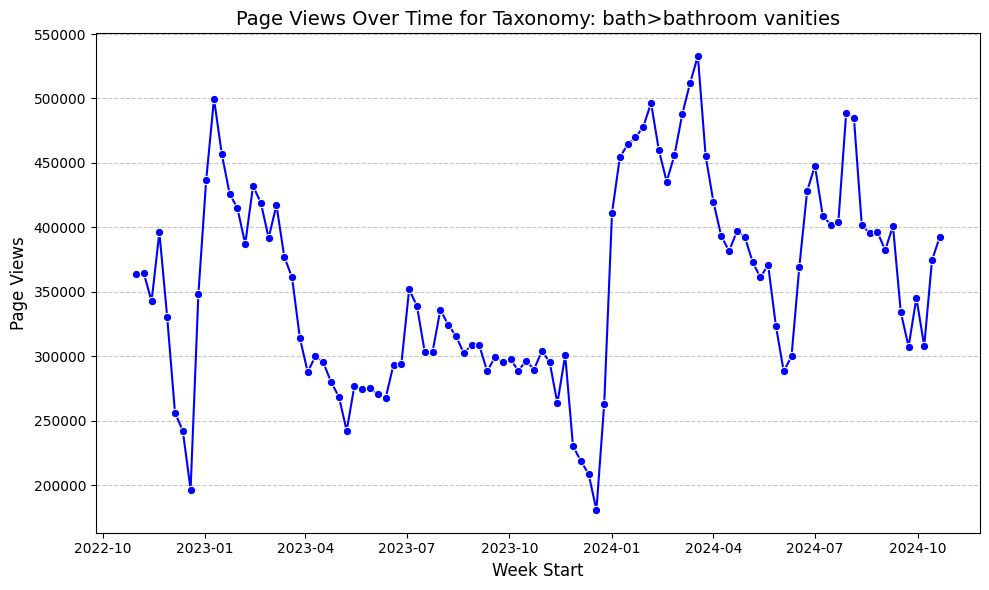

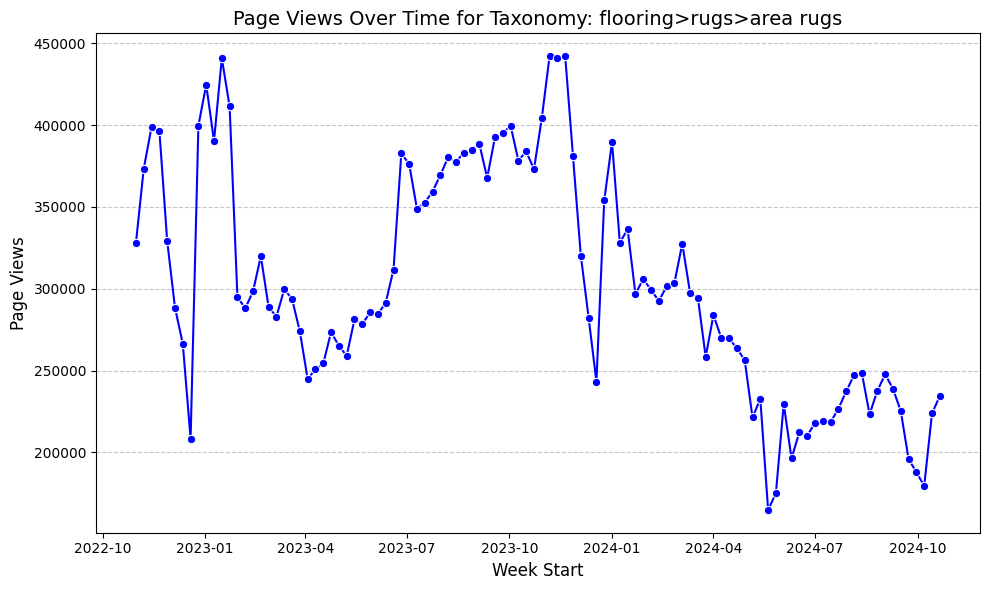

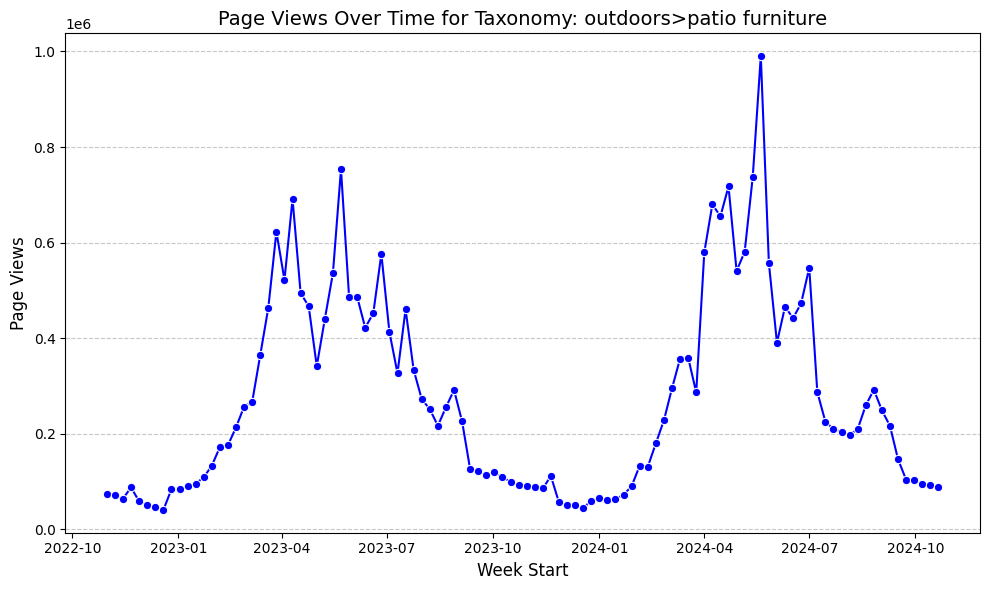

In [ ]:
# Filter data for the top 10 taxonomies based on total page views
top_10_taxonomies = df.groupby('taxonomy')['page_views'].sum().nlargest(10).index
top_10_data = df[df['taxonomy'].isin(top_10_taxonomies)]

# Group by taxonomy and week_start to calculate total page views per week
taxonomy_weekly_views = top_10_data.groupby(['taxonomy', 'week_start'])['page_views'].sum().reset_index()

# Loop through each of the top 10 taxonomies and create a graph for page views over time
for taxonomy in top_10_taxonomies:
    taxonomy_data = taxonomy_weekly_views[taxonomy_weekly_views['taxonomy'] == taxonomy]

    # Create a line plot for the specific taxonomy
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=taxonomy_data, x='week_start', y='page_views', marker='o', color = 'blue')
    plt.title(f"Page Views Over Time for Taxonomy: {taxonomy}", fontsize=14)
    plt.xlabel("Week Start", fontsize=12)
    plt.ylabel("Page Views", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

#provides page views over time per the top 10 taxonomies

In [ ]:
# Add a 'Year' column extracted from the 'week_start' date column
df['Year'] = df['week_start'].dt.year

#What are the top 10 taxonomies for the top 3 merchandising departments?

In [ ]:
# Step 1: Identify the top 3 merchandising departments based on total page views
top_3_departments = df.groupby('merch_dept')['page_views'].sum().nlargest(3).index

# Step 2: Filter data for only the top 3 departments
filtered_data_top3 = df[df['merch_dept'].isin(top_3_departments)]

# Step 3: Group by merchandising department and taxonomy to calculate total views
top_taxonomies_top3 = (
    filtered_data_top3.groupby(['merch_dept', 'taxonomy'])['page_views']
    .sum()
    .reset_index()
)

# Step 4: Sort and select the top 10 taxonomies within each of the top 3 departments
top_taxonomies_top3 = (
    top_taxonomies_top3.sort_values(['merch_dept', 'page_views'], ascending=[True, False])
    .groupby('merch_dept')
    .head(10)
)

# Display the results
print(top_taxonomies_top3)

           merch_dept                                           taxonomy  \
67   KITCHEN AND BATH                           appliances>refrigerators   
0    KITCHEN AND BATH                                         appliances   
150  KITCHEN AND BATH                             bath>bathroom vanities   
151  KITCHEN AND BATH  bath>bathroom vanities>bathroom vanities with ...   
72   KITCHEN AND BATH  appliances>refrigerators>french door refrigera...   
234  KITCHEN AND BATH                           kitchen>kitchen cabinets   
104  KITCHEN AND BATH                        appliances>washers & dryers   
22   KITCHEN AND BATH                             appliances>dishwashers   
114  KITCHEN AND BATH                                               bath   
110  KITCHEN AND BATH       appliances>washers & dryers>washing machines   
278            ONLINE                                           homepage   
280            ONLINE                                          thank you   
279         

#Build Forecasting model

In [ ]:
# Aggregate page views by week
weekly_views = df.groupby('week_start')['page_views'].sum()
weekly_views.mean()

69187607.77884616

#Weekly page views mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


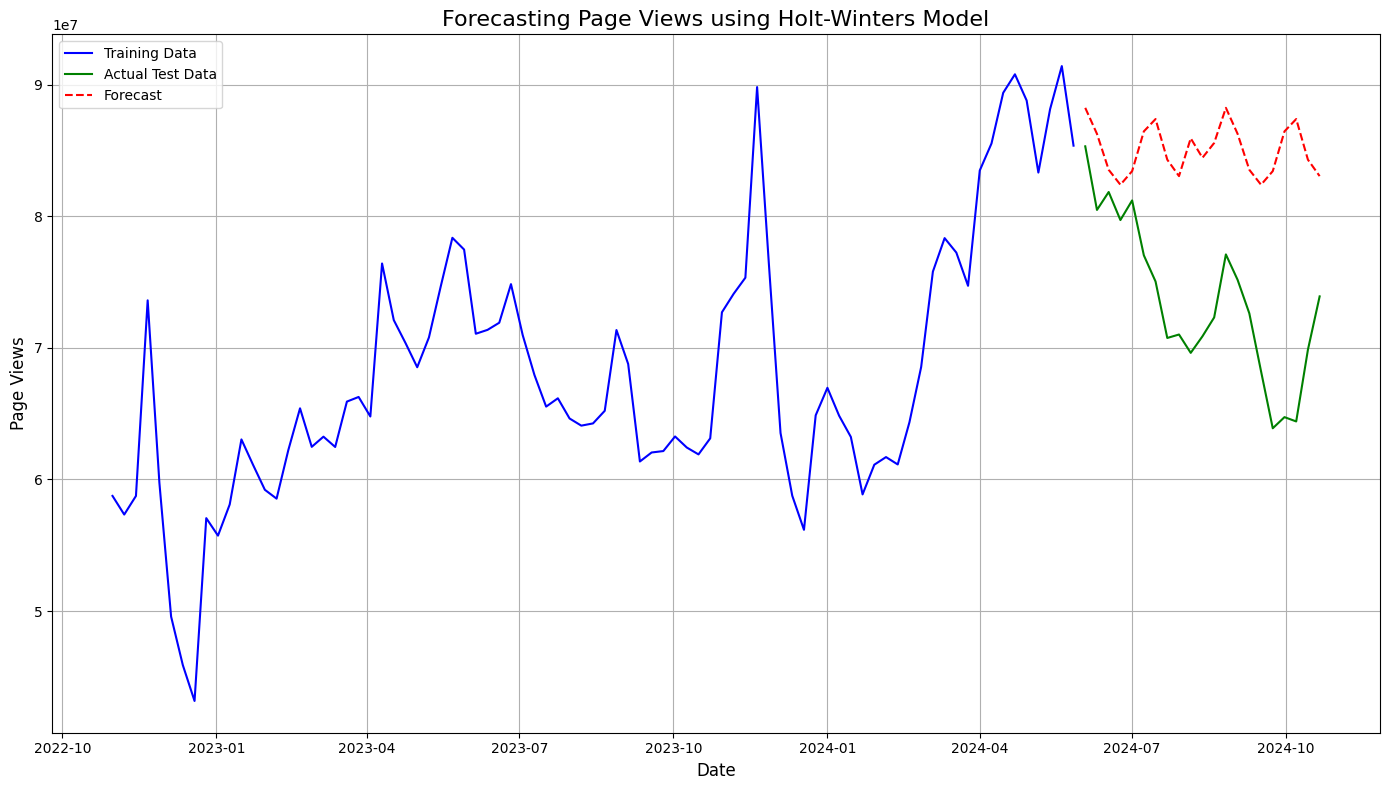

Root Mean Squared Error (RMSE): 12898826.6909623


In [ ]:

# Aggregate page views by week
weekly_views = df.groupby('week_start')['page_views'].sum()

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(weekly_views) * 0.8)
train, test = weekly_views[:train_size], weekly_views[train_size:]

# Create and fit the Holt-Winters Exponential Smoothing model
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12).fit()

# Forecast the next steps (length of the test set)
forecast = model.forecast(steps=len(test))

# Calculate mean squared error for evaluation
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

# Plot the actual vs. forecasted values
plt.figure(figsize=(14, 8))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Actual Test Data', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.title("Forecasting Page Views using Holt-Winters Model", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Page Views", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Display RMSE for model evaluation
print(f"Root Mean Squared Error (RMSE): {rmse}")

#RMSE was very high here; continue optimizing model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

Best Parameters: {'trend': None, 'seasonal': 'mul', 'seasonal_periods': 12}
Best RMSE: 12731678.901803846


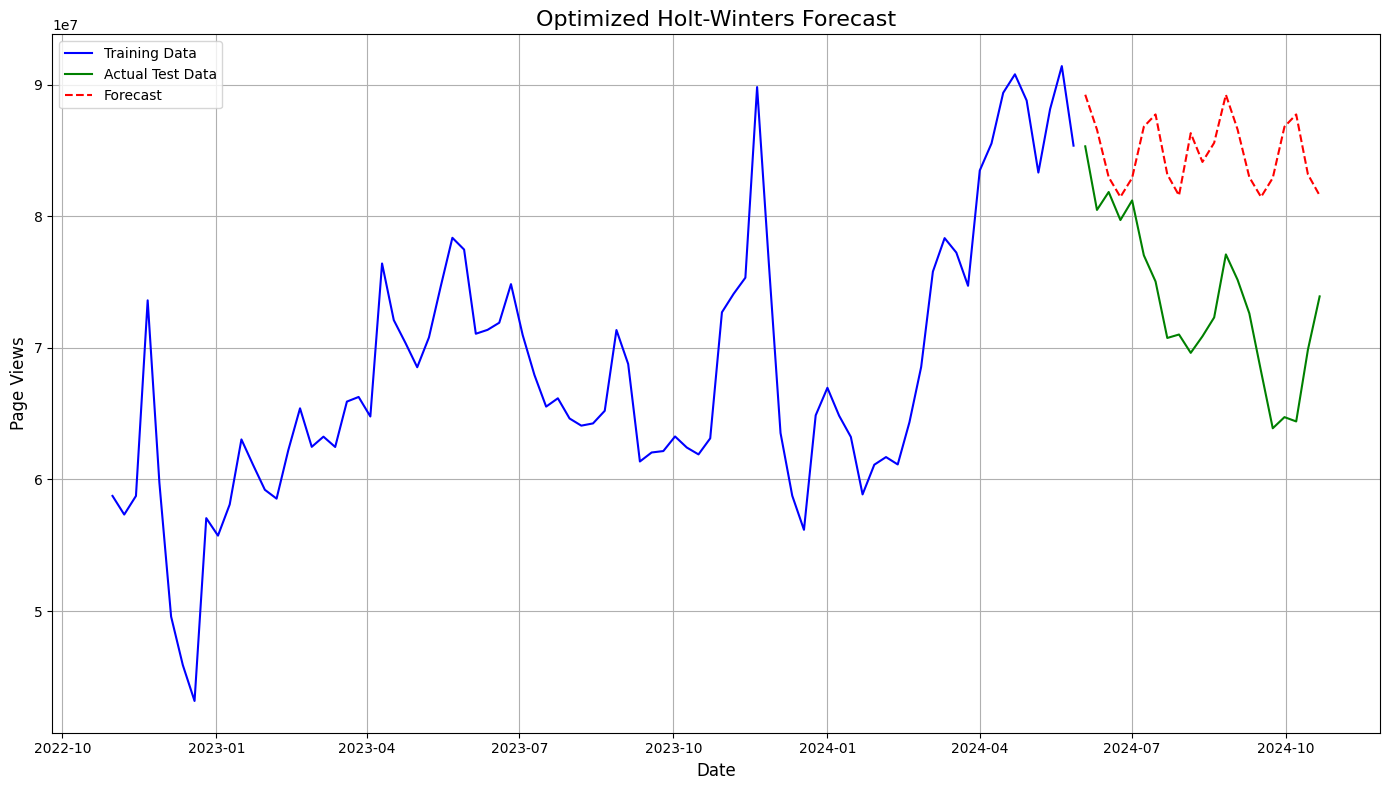

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np

# Define parameter grid
param_grid = {
    "trend": ['add', 'mul', None],
    "seasonal": ['add', 'mul', None],
    "seasonal_periods": [12, 52]  # Adjust based on data frequency
}

# Split data into training and testing sets
train_size = int(len(weekly_views) * 0.8)
train, test = weekly_views[:train_size], weekly_views[train_size:]

# Track best parameters and error
best_params = None
best_rmse = float('inf')

# Grid search
for trend in param_grid['trend']:
    for seasonal in param_grid['seasonal']:
        for seasonal_periods in param_grid['seasonal_periods']:
            # Skip incompatible configurations
            if seasonal is None and seasonal_periods is not None:
                continue

            try:
                # Fit the model
                model = ExponentialSmoothing(train, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods).fit()
                forecast = model.forecast(steps=len(test))

                # Calculate RMSE
                rmse = np.sqrt(mean_squared_error(test, forecast))

                # Update best parameters
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_params = {
                        "trend": trend,
                        "seasonal": seasonal,
                        "seasonal_periods": seasonal_periods
                    }
            except:
                continue

# Display best parameters and RMSE
print(f"Best Parameters: {best_params}")
print(f"Best RMSE: {best_rmse}")

# Fit the best model
final_model = ExponentialSmoothing(
    train,
    trend=best_params['trend'],
    seasonal=best_params['seasonal'],
    seasonal_periods=best_params['seasonal_periods']
).fit()
forecast = final_model.forecast(steps=len(test))

# Plot results
plt.figure(figsize=(14, 8))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Actual Test Data', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.title("Optimized Holt-Winters Forecast", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Page Views", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#RMSE is still very high

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


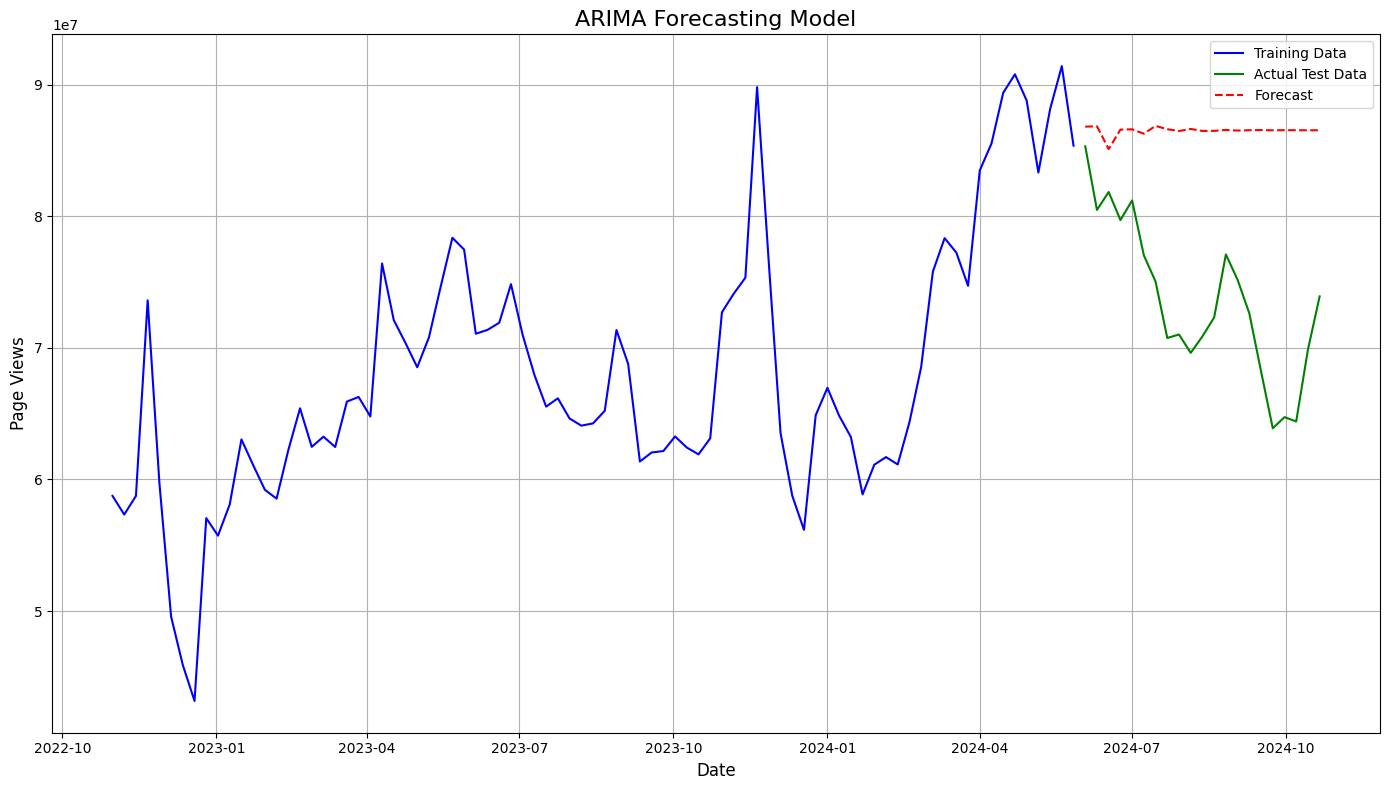

Root Mean Squared Error (RMSE): 14216566.185584275


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


# Aggregate page views by week
weekly_views = df.groupby('week_start')['page_views'].sum()

# Ensure the datetime index for ARIMA
weekly_views.index = pd.to_datetime(weekly_views.index)

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(weekly_views) * 0.8)
train, test = weekly_views[:train_size], weekly_views[train_size:]

# Fit the ARIMA model (order can be fine-tuned)
arima_order = (5, 1, 1)  # Example: p=5, d=1, q=1
model = ARIMA(train, order=arima_order)
fitted_model = model.fit()

# Forecast for the test period
forecast = fitted_model.forecast(steps=len(test))

# Calculate RMSE
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Actual Test Data', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.title("ARIMA Forecasting Model", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Page Views", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Display the RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")

#Arima is showing higher RMSE

Root Mean Squared Error (RMSE): 10467876.28441356


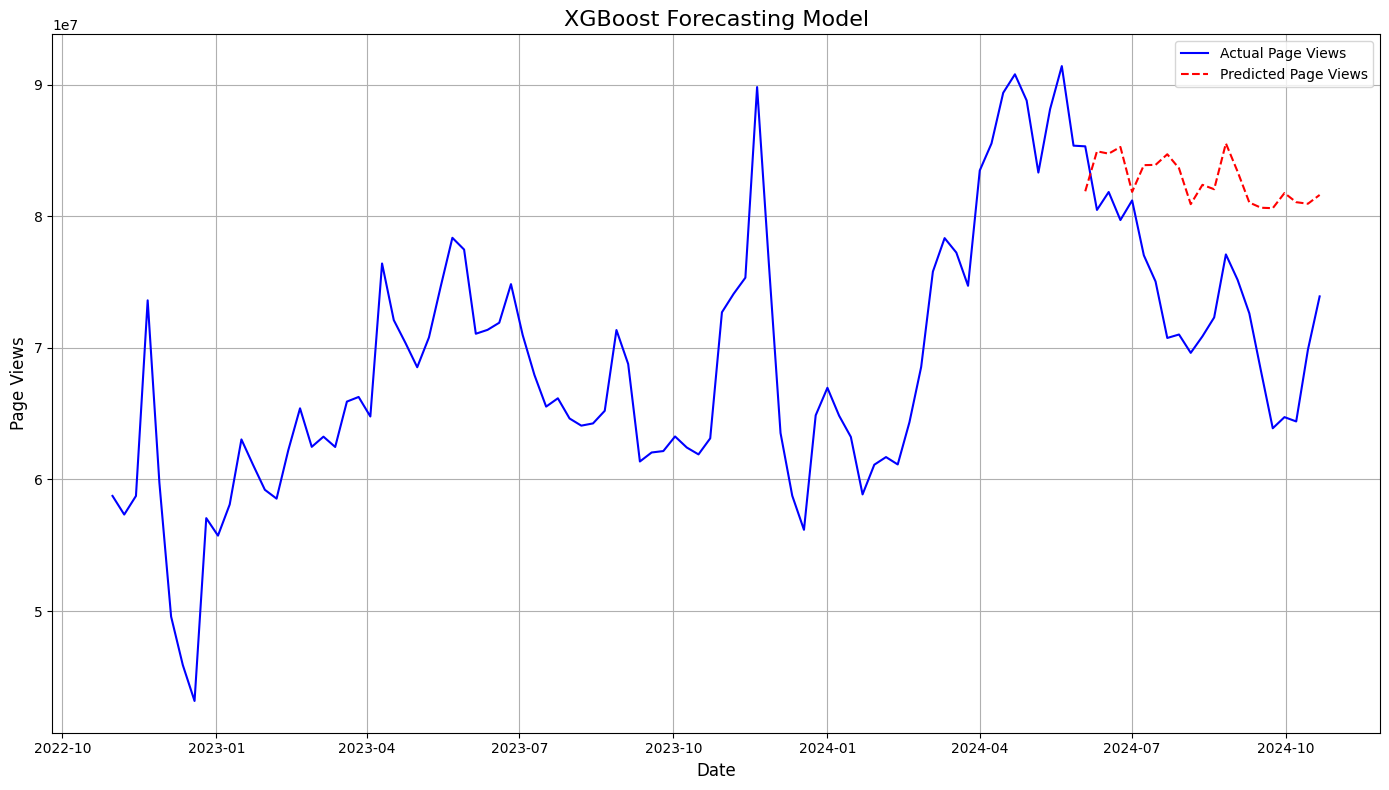

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Aggregate page views by week
weekly_views = df.groupby('week_start')['page_views'].sum().reset_index()

# Create time-based features
weekly_views['Week'] = weekly_views['week_start'].dt.isocalendar().week
weekly_views['Year'] = weekly_views['week_start'].dt.year
weekly_views['Month'] = weekly_views['week_start'].dt.month
weekly_views['Day'] = weekly_views['week_start'].dt.day

# Prepare the features (X) and target (y)
X = weekly_views[['Year', 'Month', 'Week', 'Day']]
y = weekly_views['page_views']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Initialize and train the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the actual vs. predicted values
plt.figure(figsize=(14, 8))
plt.plot(weekly_views['week_start'], y, label='Actual Page Views', color='blue')
plt.plot(weekly_views['week_start'][len(X_train):], y_pred, label='Predicted Page Views', color='red', linestyle='--')
plt.title("XGBoost Forecasting Model", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Page Views", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#Lower RMSE using XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3, verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


#optimizes the model via hyperparameter tuning

Root Mean Squared Error (RMSE): 5801644.138693461


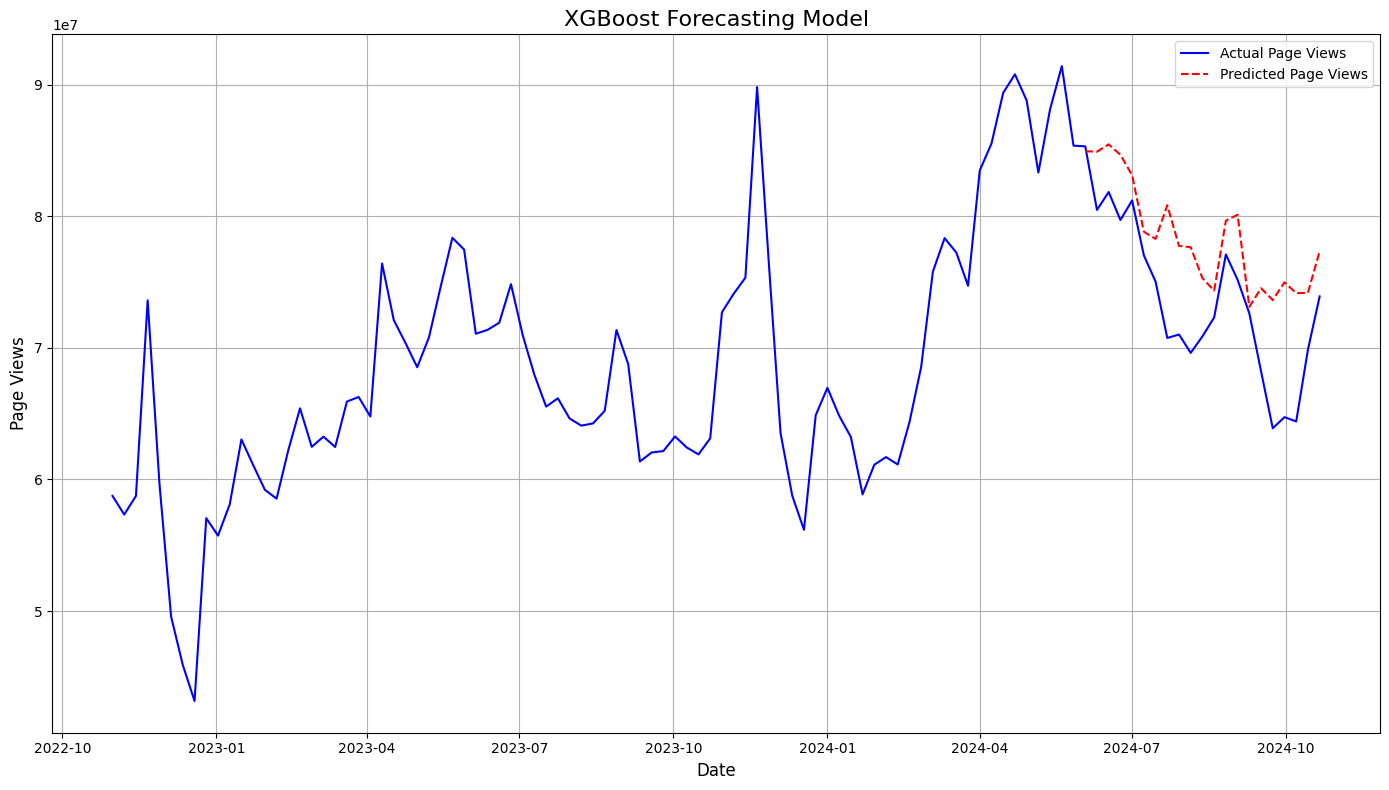

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Aggregate page views by week
weekly_views = df.groupby('week_start')['page_views'].sum().reset_index()

# Create time-based features
weekly_views['Week'] = weekly_views['week_start'].dt.isocalendar().week
weekly_views['Year'] = weekly_views['week_start'].dt.year
weekly_views['Month'] = weekly_views['week_start'].dt.month
weekly_views['Day'] = weekly_views['week_start'].dt.day

# Prepare the features (X) and target (y)
X = weekly_views[['Year', 'Month', 'Week', 'Day']]
y = weekly_views['page_views']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Initialize and train the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', colsample_bytree = 1.0,subsample = 0.8, n_estimators=200, learning_rate=0.2, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the actual vs. predicted values
plt.figure(figsize=(14, 8))
plt.plot(weekly_views['week_start'], y, label='Actual Page Views', color='blue')
plt.plot(weekly_views['week_start'][len(X_train):], y_pred, label='Predicted Page Views', color='red', linestyle='--')
plt.title("XGBoost Forecasting Model", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Page Views", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#Much lower RMSE; but still can improve

# I built a forecasting model that has an RMSE of 8.4% of the weekly average page views. Therefore, this RMSE is acceptable in regards to foreacasting page views.

Optimized RMSE: 3940808.68


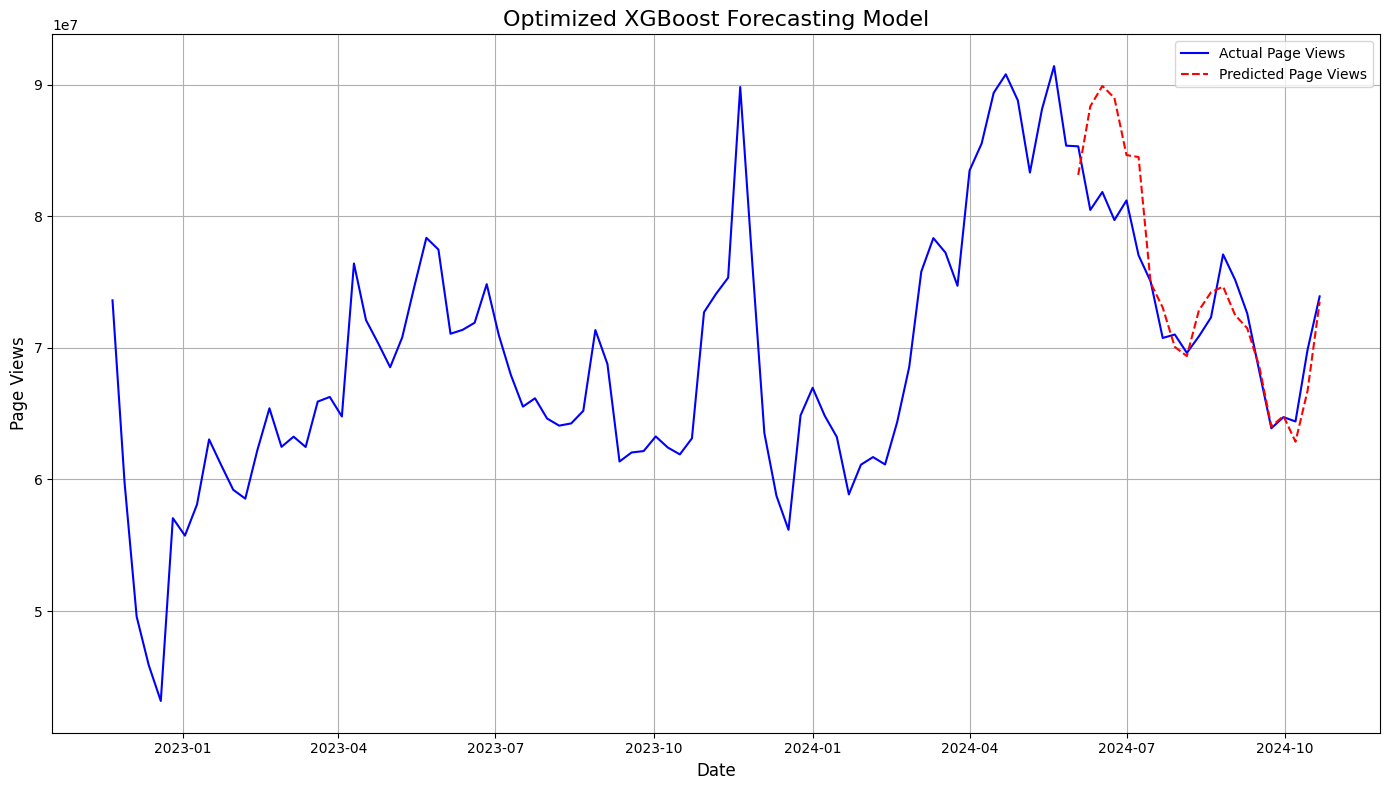

In [ ]:
# Add lag and rolling features
for lag in range(1, 4):
    weekly_views[f'lag_{lag}'] = weekly_views['page_views'].shift(lag)
weekly_views['rolling_mean_3'] = weekly_views['page_views'].rolling(window=3).mean()
weekly_views['rolling_std_3'] = weekly_views['page_views'].rolling(window=3).std()
weekly_views = weekly_views.dropna()

# Prepare the features and target
X = weekly_views[['Year', 'Month', 'Week', 'Day', 'lag_1', 'lag_2', 'lag_3', 'rolling_mean_3', 'rolling_std_3']]
y = weekly_views['page_views']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train the model with optimized parameters
xgb_model = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.8, subsample=0.8,
                         n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Optimized RMSE: {rmse:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(14, 8))
plt.plot(weekly_views['week_start'], y, label='Actual Page Views', color='blue')
plt.plot(weekly_views['week_start'][len(X_train):], y_pred, label='Predicted Page Views', color='red', linestyle='--')
plt.title("Optimized XGBoost Forecasting Model", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Page Views", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#This serves as the best model with an RMSE of 3940808.68 after adding more features and changing some parameters in the model. 5.4% error